In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

# classes for special types
from pandas.api.types import CategoricalDtype

# Apply the default theme, set bigger font
sns.set_theme()

# Reading and adjusting data
jan19 = pd.read_csv("./data/standard_1901.csv", sep='|')
jan19.head()

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
0,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2019,1
1,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2019,1
2,5716365,"A Hamid, Harman",MAS,M,NaN,NaN,NI,NaN,1325,0,40,1970,NaN,2019,1
3,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,0,40,0,i,2019,1
4,5045886,"A K, Kalshyan",IND,M,NaN,NaN,NaN,NaN,1826,0,20,1964,NaN,2019,1


In [ ]:
sns.set()
cols = ['Fed', 'Sex', 'Tit', 'WTit','OTit' ,'FOA', 'Rat', 'Gms','K','B-day']
sns.pairplot(jan19[cols], size = 2.5)

In [30]:
feb19 = pd.read_csv("./data/standard_1902.csv", sep='|', dtype={'FOA': 'str'})
feb19.head()
print(feb19.dtypes)
print(feb19[["Rat"]].nunique())
print(feb19["Rat"].unique())

ID Number     int64
Name         object
Fed          object
Sex          object
Tit          object
WTit         object
OTit         object
FOA          object
Rat           int64
Gms           int64
K             int64
B-day         int64
Flag         object
Year          int64
Mon           int64
dtype: object
Rat    1718
dtype: int64
[1061 1151 1840 ... 2722 2583 2764]


In [77]:
#df = pd.concat([jan19, feb19])
#by_name = df.loc[df['Name'] == 'A Chakravarthy']
#by_name
mar19 = pd.read_csv("./data/standard_2001.csv", sep='|', dtype={'FOA': 'str', 'B-day': 'str', 'Rat': 'str'})
mar19.head()
mar19['B-day'] = mar19['B-day'].str.replace('0 ', '')
mar19['B-day'] = mar19['B-day'].astype('int64')
mar19['Rat'] = mar19['Rat'].str.replace('M ', '')
mar19['Rat'] = mar19['Rat'].astype('int64')
print(mar19.dtypes)
print(mar19[["WTit"]].nunique())
print(mar19["WTit"].unique())

ID Number     int64
Name         object
Fed          object
Sex          object
Tit          object
WTit         object
OTit         object
FOA          object
Rat           int64
Gms           int64
K             int64
B-day         int64
Flag         object
Year          int64
Mon           int64
dtype: object
WTit    5
dtype: int64
[nan 'WFM' 'WIM' 'WCM' 'WGM' 'WH']


In [88]:
file_name = 'standard_{}.csv'
df_list = []
for i in [1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112]:
    df_list.append(pd.read_csv(file_name.format(i), sep='|', dtype={'FOA': 'str', 'B-day': 'str', 'Rat': 'str'}))

df = pd.concat(df_list)
df['B-day'] = df['B-day'].str.replace('0 ', '')
df['B-day'] = df['B-day'].astype('int64')
df['Rat'] = df['Rat'].str.replace('M ', '')
df['Rat'] = df['Rat'].astype('int64')
#print(df.dtypes)
#print(df[["WTit"]].nunique())
#print(df["WTit"].unique())


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12805667 entries, 0 to 375274
Data columns (total 15 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ID Number  int64 
 1   Name       object
 2   Fed        object
 3   Sex        object
 4   Tit        object
 5   WTit       object
 6   OTit       object
 7   FOA        object
 8   Rat        int64 
 9   Gms        int64 
 10  K          int64 
 11  B-day      int64 
 12  Flag       object
 13  Year       int64 
 14  Mon        int64 
dtypes: int64(7), object(8)
memory usage: 1.5+ GB


In [89]:
df['Age'] = df['Year'] - df['B-day']
df = df.drop(columns=['B-day'], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12805667 entries, 0 to 375274
Data columns (total 15 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ID Number  int64 
 1   Name       object
 2   Fed        object
 3   Sex        object
 4   Tit        object
 5   WTit       object
 6   OTit       object
 7   FOA        object
 8   Rat        int64 
 9   Gms        int64 
 10  K          int64 
 11  Flag       object
 12  Year       int64 
 13  Mon        int64 
 14  Age        int64 
dtypes: int64(7), object(8)
memory usage: 1.5+ GB


In [91]:
df.sort_values(by='Name', ascending=True)
df.head(20)

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,Flag,Year,Mon,Age
0,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,i,2019,1,33
1,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,i,2019,1,45
2,5716365,"A Hamid, Harman",MAS,M,NaN,NaN,NI,NaN,1325,0,40,NaN,2019,1,49
3,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,0,40,i,2019,1,2019
4,5045886,"A K, Kalshyan",IND,M,NaN,NaN,NaN,NaN,1826,0,20,NaN,2019,1,55
5,8605360,"A La, Teng Hua",CHN,F,NaN,NaN,NaN,NaN,1915,0,40,wi,2019,1,26
6,10238387,"A Q M Salahuddin, Khan",BAN,M,NaN,NaN,NaN,NaN,1520,0,40,NaN,2019,1,42
7,5716373,"A Rajah, Abdul Shukor",MAS,M,NaN,NaN,NaN,NaN,1809,0,40,i,2019,1,2019
8,10231447,"A S M Khalid, Hasan",BAN,M,NaN,NaN,NaN,NaN,1585,0,40,i,2019,1,31
9,5080444,"A, Sohita",IND,F,NaN,NaN,NaN,NaN,1447,0,40,wi,2019,1,24


In [106]:
by_name = df.loc[df['Name'] == 'A-ALI,Sali Abbas Abdulzahra']
by_name

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,Flag,Year,Mon,Age
10,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1928,3,40,w,2019,1,18
11,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1928,0,40,w,2019,2,18
11,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1928,0,40,w,2019,3,18
11,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1928,0,40,w,2019,4,18
11,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1943,2,40,w,2019,5,18
11,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1943,0,40,w,2019,6,18
12,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1943,0,40,w,2019,7,18
12,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1979,7,40,w,2019,8,18
12,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1979,0,40,w,2019,9,18
13,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1979,0,40,w,2019,10,18


In [118]:
print(df[["Flag"]].nunique())
print(df["Flag"].unique())

Flag    3
dtype: int64
['i' nan 'wi' 'w']


In [97]:
freqtab = df.groupby("Tit").agg(count=("ID Number", "count")) # absolute frequencies (counts)
freqtab["count_cum"] = freqtab["count"].cumsum() # cumulative frequencies
freqtab["count_rel"] = freqtab["count"] / sum(freqtab["count"]) # relative frequencies
freqtab["count_relcum"] = freqtab["count_rel"].cumsum() # cumulative relative frequencies
print(freqtab)

      count  count_cum  count_rel  count_relcum
Tit                                            
CM    64497      64497   0.093588      0.093588
FM   293214     357711   0.425466      0.519054
GM    61462     419173   0.089184      0.608238
IM   138902     558075   0.201553      0.809791
WCM   27678     585753   0.040162      0.849953
WFM   62269     648022   0.090355      0.940308
WGM   11246     659268   0.016318      0.956627
WH       36     659304   0.000052      0.956679
WIM   29855     689159   0.043321      1.000000


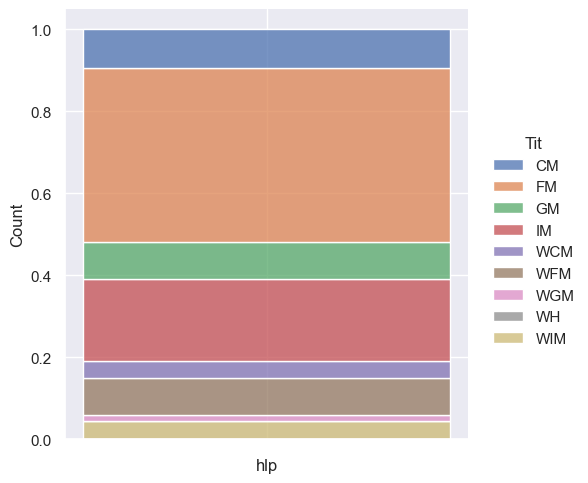

In [99]:
g = sns.displot(data=freqtab.assign(hlp=""),
                x="hlp", hue="Tit", multiple="stack", weights="count_rel")

In [100]:
freqtab_w = df.groupby("WTit").agg(count=("ID Number", "count")) # absolute frequencies (counts)
freqtab_w["count_cum"] = freqtab_w["count"].cumsum() # cumulative frequencies
freqtab_w["count_rel"] = freqtab_w["count"] / sum(freqtab["count"]) # relative frequencies
freqtab_w["count_relcum"] = freqtab_w["count_rel"].cumsum() # cumulative relative frequencies
print(freqtab_w)

      count  count_cum  count_rel  count_relcum
WTit                                           
WCM   27723      27723   0.040227      0.040227
WFM   62674      90397   0.090943      0.131170
WGM   16727     107124   0.024272      0.155442
WH       36     107160   0.000052      0.155494
WIM   30661     137821   0.044490      0.199984


In [101]:
freqtab_o = df.groupby("OTit").agg(count=("ID Number", "count")) # absolute frequencies (counts)
freqtab_o["count_cum"] = freqtab_o["count"].cumsum() # cumulative frequencies
freqtab_o["count_rel"] = freqtab_o["count"] / sum(freqtab["count"]) # relative frequencies
freqtab_o["count_relcum"] = freqtab_o["count_rel"].cumsum() # cumulative relative frequencies
print(freqtab_o)

                count  count_cum  count_rel  count_relcum
OTit                                                     
0,0,NI              4          4   0.000006      0.000006
0,FST               6         10   0.000009      0.000015
0,NI,0              2         12   0.000003      0.000017
DI               4783       4795   0.006940      0.006958
DI,DI               4       4799   0.000006      0.006964
...               ...        ...        ...           ...
SI,SI,FI,           1     138204   0.000001      0.200540
SI,SI,FI,SI,SI     22     138226   0.000032      0.200572
SI,SI,FT            8     138234   0.000012      0.200584
SI,SI,NI           60     138294   0.000087      0.200671
SI,SI,SI,SI         2     138296   0.000003      0.200674

[223 rows x 4 columns]


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12805667 entries, 0 to 375274
Data columns (total 15 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ID Number  int64 
 1   Name       object
 2   Fed        object
 3   Sex        object
 4   Tit        object
 5   WTit       object
 6   OTit       object
 7   FOA        object
 8   Rat        int64 
 9   Gms        int64 
 10  K          int64 
 11  Flag       object
 12  Year       int64 
 13  Mon        int64 
 14  Age        int64 
dtypes: int64(7), object(8)
memory usage: 1.5+ GB


In [103]:
sum(df.duplicated(subset=['ID Number', 'Name', 'Fed', 'Sex', 'Tit', 'WTit',
       'OTit', 'FOA', 'Rat', 'Gms', 'K', 'Flag', 'Year',
       'Mon', 'Age']))

0

In [104]:
print(1 - df.count()/len(df))

ID Number    0.000000e+00
Name         7.809043e-08
Fed          0.000000e+00
Sex          0.000000e+00
Tit          9.461833e-01
WTit         9.892375e-01
OTit         9.892004e-01
FOA          9.948259e-01
Rat          0.000000e+00
Gms          0.000000e+00
K            0.000000e+00
Flag         4.253524e-01
Year         0.000000e+00
Mon          0.000000e+00
Age          0.000000e+00
dtype: float64


In [ ]:
df.count(axis=1).value_counts()

In [108]:
df.isna().sum()

ID Number           0
Name                1
Fed                 0
Sex                 0
Tit          12116508
WTit         12667846
OTit         12667371
FOA          12739409
Rat                 0
Gms                 0
K                   0
Flag          5446921
Year                0
Mon                 0
Age                 0
dtype: int64

      rate_class
Tit             
CM   2009.664605
FM   2243.405646
GM   2505.767629
IM   2352.761400
WCM  1668.911554
WFM  2008.162135
WGM  2242.891161
WH   2080.000000
WIM  2115.810216


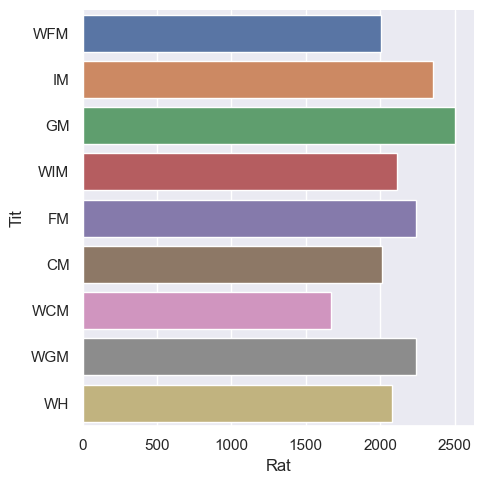

In [116]:
print(df.groupby("Tit").agg(rate_class=("Rat", "mean")))
g = sns.catplot(data=df, x="Rat", y="Tit", kind="bar", errorbar=None)

In [117]:
print(df[df["Name"].isna()])

   ID Number Name  Fed Sex Tit WTit OTit  FOA   Rat  Gms   K Flag  Year  Mon  \
0    1210246  NaN  ROU   M  IM  WGM  NaN  NaN  2287    0  10  NaN  2020    9   

    Age  
0  2020  
